In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn import datasets, svm, metrics

# Matplotlib 
import matplotlib.pyplot as plt
# Seaborn library
import seaborn as sns
sns.set()

import os
from scipy.special import expit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Новый раздел

In [1]:
train = pd.read_csv('/content/emnist-letters-train.csv', header = 0, delimiter=',')
test = pd.read_csv('/content/emnist-letters-test.csv', header = 0, delimiter=',')

NameError: ignored

In [ ]:
test2 = pd.read_csv('/content/emnist-letters-test-data.csv', header = 0, delimiter=',')

In [ ]:
x_train = train.iloc[:,range(1,785)].to_numpy()
x_train = x_train.reshape(x_train.shape[0],28,28,1).transpose(0,2,1,3)
y_train = train.iloc[:,0].to_numpy()
x_test2 = test2.iloc[:,range(1,785)].to_numpy()
x_test2 = x_test2.reshape(x_test2.shape[0],28,28,1)
y_test2 = test2.iloc[:,0].to_numpy()

In [ ]:
x_test = test.iloc[:,range(1,785)].to_numpy()
x_test = x_test.reshape(x_test.shape[0],28,28,1).transpose(0,2,1,3)
y_test = test.iloc[:,0].to_numpy()

In [ ]:
print("Shape of eigen vectors = ",x_train.shape)

Shape of eigen vectors =  (88799, 28, 28, 1)


In [ ]:
clf = KNeighborsClassifier()

In [ ]:
clf.fit(x_train.reshape(88799,784), y_train)
print("Compute predictions")
predicted = clf.predict(x_test.reshape(14799,784))
print("Accuracy: ", accuracy_score(y_test, predicted))

Compute predictions
Accuracy:  0.842827218055274


In [ ]:
columns = ['labels']
for i in range(train.shape[1]-1):
    columns.append(i)
    
train.columns = columns
test.columns = columns
test2.columns = columns

classes = train['labels'].unique()
print('number of classes: ', len(classes))

train.head()

number of classes:  26


labels  0  1  2  3  4  5  6  7  8  ...  774  775  776  777  778  779  780  \
0       7  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1      16  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2      15  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3      23  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4      17  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

   781  782  783  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 785 columns]

In [ ]:
test2.head()

labels  0  1  2  3  4  5  6  7  8  ...  774  775  776  777  778  779  780  \
0       0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1       1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2       2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3       3  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4       4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

   781  782  783  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 785 columns]

In [ ]:
classes = test2['labels'].unique()
print('number of classes: ', len(classes))

number of classes:  20800


In [ ]:
l = train['labels'].values

In [ ]:
from sklearn.model_selection import train_test_split

# split training and validation data using sklearn
x_train, x_val, y_train, y_val = train_test_split(train.drop(['labels'], axis=1),
                                                  train.labels - 1,
                                                  train_size=0.8,
                                                  test_size=0.2,
                                                  random_state=42)

# reshape and normalize test data
x_train = x_train / 255.0
x_val = x_val / 255.0


#testX = test.values[:, 1:].reshape(test.shape[0],28, 28, 1).astype('float32')
testX = test.values[:, 1:].reshape(test.shape[0],28, 28, 1).transpose(0,2,1,3).astype('float32')
x_test = testX / 255.0
y_test = test['labels'].values - 1 # this is just to make the neurons in the output layer start at 0

testX2 = test2.values[:, 1:].reshape(test2.shape[0],28, 28, 1).astype('float32')
#testX2 = np.flipud(np.rot90(testX2, k=1))
#testX2 = testX2.reshape(28*28)
x_test2 = testX2 / 255.0
y_test2 = test2['labels'].values - 1 # this is just to make the neurons in the output layer start at 0

print('trianing set: ', x_train.shape, y_train.shape)
print('validation set: ', x_val.shape, y_val.shape)
print('test set: ', x_test.shape, y_test.shape)
print('test2 set: ', x_test2.shape, y_test2.shape)

AttributeError: 'DataFrame' object has no attribute 'moveaxis'

In [ ]:
y1 = np.array(x_train.iloc[:,0].values)
x1 = np.array(x_train.iloc[:,0:].values)
#testing_labels
y2 = np.array(test2.iloc[:,0].values)
x2 = np.array(test2.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

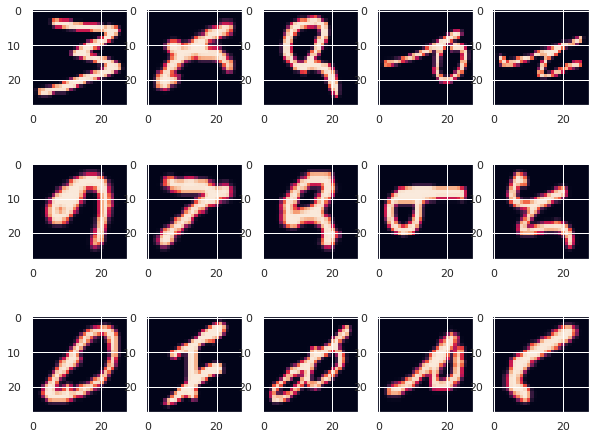

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
 ax.imshow(x1[i].reshape([28,28]))

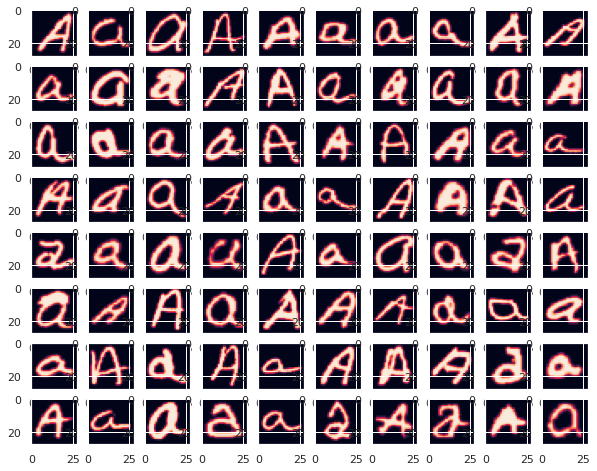

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(8,10,figsize=(10,8))
for i,ax in enumerate(axes.flat):
 ax.imshow(testX[i].reshape([28,28]))

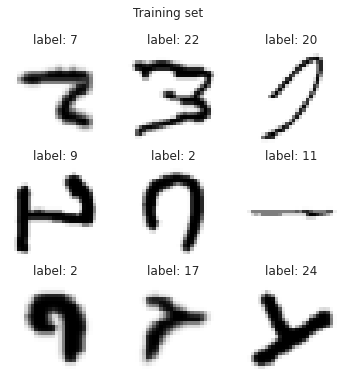

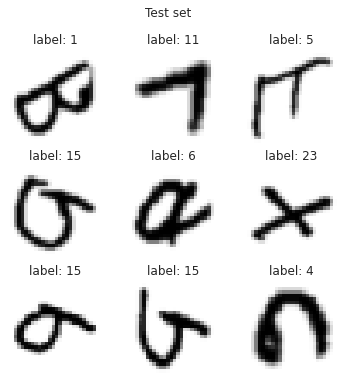

In [ ]:
import matplotlib.pyplot as plt
import random
# select random samples from training dataset
train_samples = random.sample(range(0, len(x_train)), 9)
test_samples = random.sample(range(0, len(x_val)), 9)

x_train
plt.figure(figsize=(6, 6))
plt.suptitle('Training set')
for i in train_samples:
    plt.subplot(3, 3, train_samples.index(i)+1)
    plt.imshow(x_train.iloc[i,:].values.reshape(28,28), cmap='binary')
    plt.title(f'label: {y_train.iloc[i]}')
    plt.axis('off')
    
plt.figure(figsize=(6, 6))
plt.suptitle('Test set')
for i in test_samples:
    plt.subplot(3, 3, test_samples.index(i)+1)
    plt.imshow(x_val.iloc[i,:].values.reshape(28,28), cmap='binary')
    plt.title(f'label: {y_val.iloc[i]}')
    plt.axis('off')

In [ ]:
d0 = train.drop(['labels'], axis=1)

In [ ]:
d0 = train

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(d0)
print(standardized_data.shape)

(88799, 784)


In [ ]:
# Once the data is standardized i.e, mean = 0, std.deviation = 1;
# then the co-variance matrix of A is calculated as : A^T * A

sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of co-variance matrix = ", covar_matrix.shape)

The shape of co-variance matrix =  (784, 784)


In [ ]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [ ]:
# projecting the original data sample on the plane 
# formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 88799)  =  (2, 88799)


In [ ]:
new_coordinates

array([[ 11.65031008,  -0.79832404,   5.96301254, ...,  -2.54394872,
        -18.69230409,  -7.14908475],
       [ -9.3591711 ,  10.53585814, -13.59347085, ...,  -2.49260593,
         -8.77138412,   9.31520436]])

In [ ]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, l)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      11.650310      -9.359171    7.0
1      -0.798324      10.535858   16.0
2       5.963013     -13.593471   15.0
3      -3.241293     -16.072623   23.0
4       1.082312       9.126574   17.0


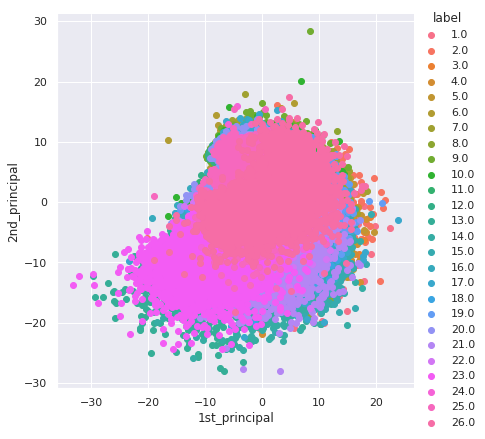

In [ ]:
import seaborn as sn

sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [ ]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (88799, 2)


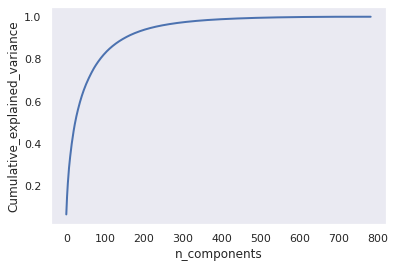

In [ ]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
x_train_transformed = pca.fit_transform(x_train.reshape(88799,784))
x_test_transformed = pca.transform(x_test.reshape(14799,784))

In [ ]:
x_test_transformed2 = pca.transform(x_test2.reshape(20800,784))

In [ ]:
clf = KNeighborsClassifier()

In [ ]:
clf.fit(x_train, y_train)
print("Compute predictions")
predicted = clf.predict(x_test.reshape(14799,784))
print("Accuracy: ", accuracy_score(y_test, predicted))

In [ ]:
clf.fit(x_train_transformed, y_train)
print("Compute predictions")
predicted = clf.predict(x_test_transformed)
print("Accuracy: ", accuracy_score(y_test, predicted))

Compute predictions
Accuracy:  0.8471518345834178


In [ ]:


x_test_transformed2 = pca.transform(x_test2.reshape(20800,784))

In [ ]:
clf.fit(x_train, y_train)
print("Compute predictions")
predicted = clf.predict(x_test2.reshape(20800,784))
print("Accuracy: ", accuracy_score(y_test2, predicted))

Compute predictions
Accuracy:  0.0


In [ ]:
predicted

array([ 8, 11,  6, ..., 20, 21,  7])

In [ ]:
mapp = pd.read_csv(
    r'emnist-letters-mapping.txt',
    delimiter=' ',
    index_col=0,
    header=None,
    squeeze=True
)
string_list = [chr(i) for i in mapp[1].values]
string_list
mapp['String'] = string_list
mapp

1    2 String
0                 
1   65   97      A
2   66   98      B
3   67   99      C
4   68  100      D
5   69  101      E
6   70  102      F
7   71  103      G
8   72  104      H
9   73  105      I
10  74  106      J
11  75  107      K
12  76  108      L
13  77  109      M
14  78  110      N
15  79  111      O
16  80  112      P
17  81  113      Q
18  82  114      R
19  83  115      S
20  84  116      T
21  85  117      U
22  86  118      V
23  87  119      W
24  88  120      X
25  89  121      Y
26  90  122      Z

In [ ]:
mapp.iloc[0]['String']

'A'

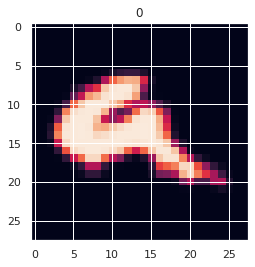

In [ ]:
prediction=clf.predict(x_test2[0].reshape(1,784))
y_predict=(prediction>0.5)
plt.imshow(x_test2[0].reshape(28,28))
plt.title(chr(mapp[np.argmax(y_predict)]))
plt.show()

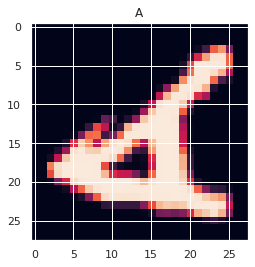

In [ ]:
prediction=clf.predict(x_test[54].reshape(1,784))
y_predict=(prediction>0.5)
plt.imshow(x_test[54].reshape(28,28))
plt.title(mapp.iloc[prediction[0]]['String'])
plt.show()

In [ ]:
prediction=clf.predict(x_train[54])
y_predict=(prediction>0.5)
plt.imshow(x_train[54].reshape(28,28))
plt.title(mapp.iloc[prediction[0]]['String'])
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
mapp.iloc[prediction[0]]['String']

'L'

In [ ]:
prediction[0]

11

In [ ]:
mapp

1    2 String
0                 
1   65   97      A
2   66   98      B
3   67   99      C
4   68  100      D
5   69  101      E
6   70  102      F
7   71  103      G
8   72  104      H
9   73  105      I
10  74  106      J
11  75  107      K
12  76  108      L
13  77  109      M
14  78  110      N
15  79  111      O
16  80  112      P
17  81  113      Q
18  82  114      R
19  83  115      S
20  84  116      T
21  85  117      U
22  86  118      V
23  87  119      W
24  88  120      X
25  89  121      Y
26  90  122      Z

In [ ]:
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(x_train_transformed, y_train)

# predict
y_pred = non_linear_model.predict(x_test_transformed)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8958713426582877 

[[736   1   1   6   2   0   7   3   0   1   2   0   0   5   5   3  16   1
    0   2   3   0   0   1   0   4]
 [  4 747   0   5   3   1   6  15   0   1   0   5   0   1   4   0   3   2
    0   0   0   0   0   0   0   3]
 [  3   1 753   2  18   1   1   0   2   0   0   4   0   0   4   0   2   4
    0   1   2   0   1   1   0   0]
 [  8   7   0 726   0   1   1   0   1   5   0   0   0   3  33   3   4   1
    0   0   2   1   1   0   2   1]
 [  8   5  17   0 745   2   2   1   1   0   0   2   1   0   2   2   2   5
    0   3   1   0   0   0   0   1]
 [  0   0   0   2   2 734   2   0   3   0   1   2   0   0   0  23   2   6
    1  20   0   0   0   0   1   1]
 [ 21  13   6   2   3   1 595   1   0   9   1   0   0   1   4   1 130   1
    6   1   0   0   1   0   3   0]
 [  5   5   0   2   0   1   0 728   2   0   4  12   9  18   0   0   0   2
    0   1   4   0   3   1   3   0]
 [  0   1   1   1   1   2   1   0 613   8   2 157   0   0   0   0   0   1
    2   1   0   1   1  

In [ ]:
non_linear_model = SVC(kernel='rbf', C= 10, gamma= 0.01)
non_linear_model.fit(x_train_transformed, y_train)

# predict
y_pred = non_linear_model.predict(x_test_transformed)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 799]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 800]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 800]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 800]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 800]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 800]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 800]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 800]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 800]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 800]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 800]
 [  0   0   0   0   0   0   0   0   0   0   0   0

In [ ]:
y_predict_k = non_linear_model.predict(x_test_transformed2)

In [ ]:
import csv
with open ("submission.csv", 'w') as f:
    fieldnames = ["id","class"]
    writer = csv.DictWriter(f,fieldnames=fieldnames)
    writer.writeheader()
    i = 0
    print(y_predict_k)
    for elem in y_predict_k:
        writer.writerow({"id":i,"class":elem.astype(np.int32)})
        i+=1

[25 25 25 ... 25 25 25]
